# Assignment: K-NEAREST NEIGHBOURS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

In [4]:
df = pd.read_csv('Zoo.csv')

In [6]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [8]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [10]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [12]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [16]:
df.loc[:, "hair":"catsize"]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
df.loc[:,"hair":"catsize"] = df.loc[:,"hair":"catsize"].replace(0, np.nan)

In [22]:
df.isna().sum()

animal name     0
hair           58
feathers       81
eggs           42
milk           60
airborne       77
aquatic        65
predator       45
toothed        40
backbone       18
breathes       21
venomous       93
fins           84
legs           23
tail           26
domestic       88
catsize        57
type            0
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer

In [26]:
si = SimpleImputer(strategy='median')
df.loc[:, "hair":'catsize']= si.fit_transform(df.loc[:, "hair":'catsize'])

In [28]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [30]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['animal name'], dtype='object')

In [32]:
df[cat_cols]

,animal name
0,aardvark
1,antelope
2,bass
3,bear
4,boar
...,...
96,wallaby
97,wasp
98,wolf
99,worm


In [34]:
oe = OrdinalEncoder()

In [36]:
df[cat_cols] = oe.fit_transform(df[cat_cols])

In [ ]:
# model building

In [38]:
x = df.iloc[:,:-1]
y = df['type']

In [40]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [42]:
x

array([[-1.70884021,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.67414817,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.63945614,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.65628693,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.69097896,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.725671  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.7625, 0.5714285714285714)

In [ ]:
# hyperparameter tunning

In [48]:
train_acc=[]
test_acc=[]

In [50]:
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain, ytrain))
    test_acc.append(knn.score(xtest, ytest))

In [52]:
train_acc

[1.0,
 0.8,
 0.7625,
 0.7,
 0.7,
 0.6375,
 0.5875,
 0.5875,
 0.5625,
 0.5875,
 0.575,
 0.5625,
 0.5375,
 0.5125,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525]

In [54]:
test_acc

[0.6666666666666666,
 0.6666666666666666,
 0.5714285714285714,
 0.5714285714285714,
 0.6190476190476191,
 0.6190476190476191,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6190476190476191,
 0.6190476190476191,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714]

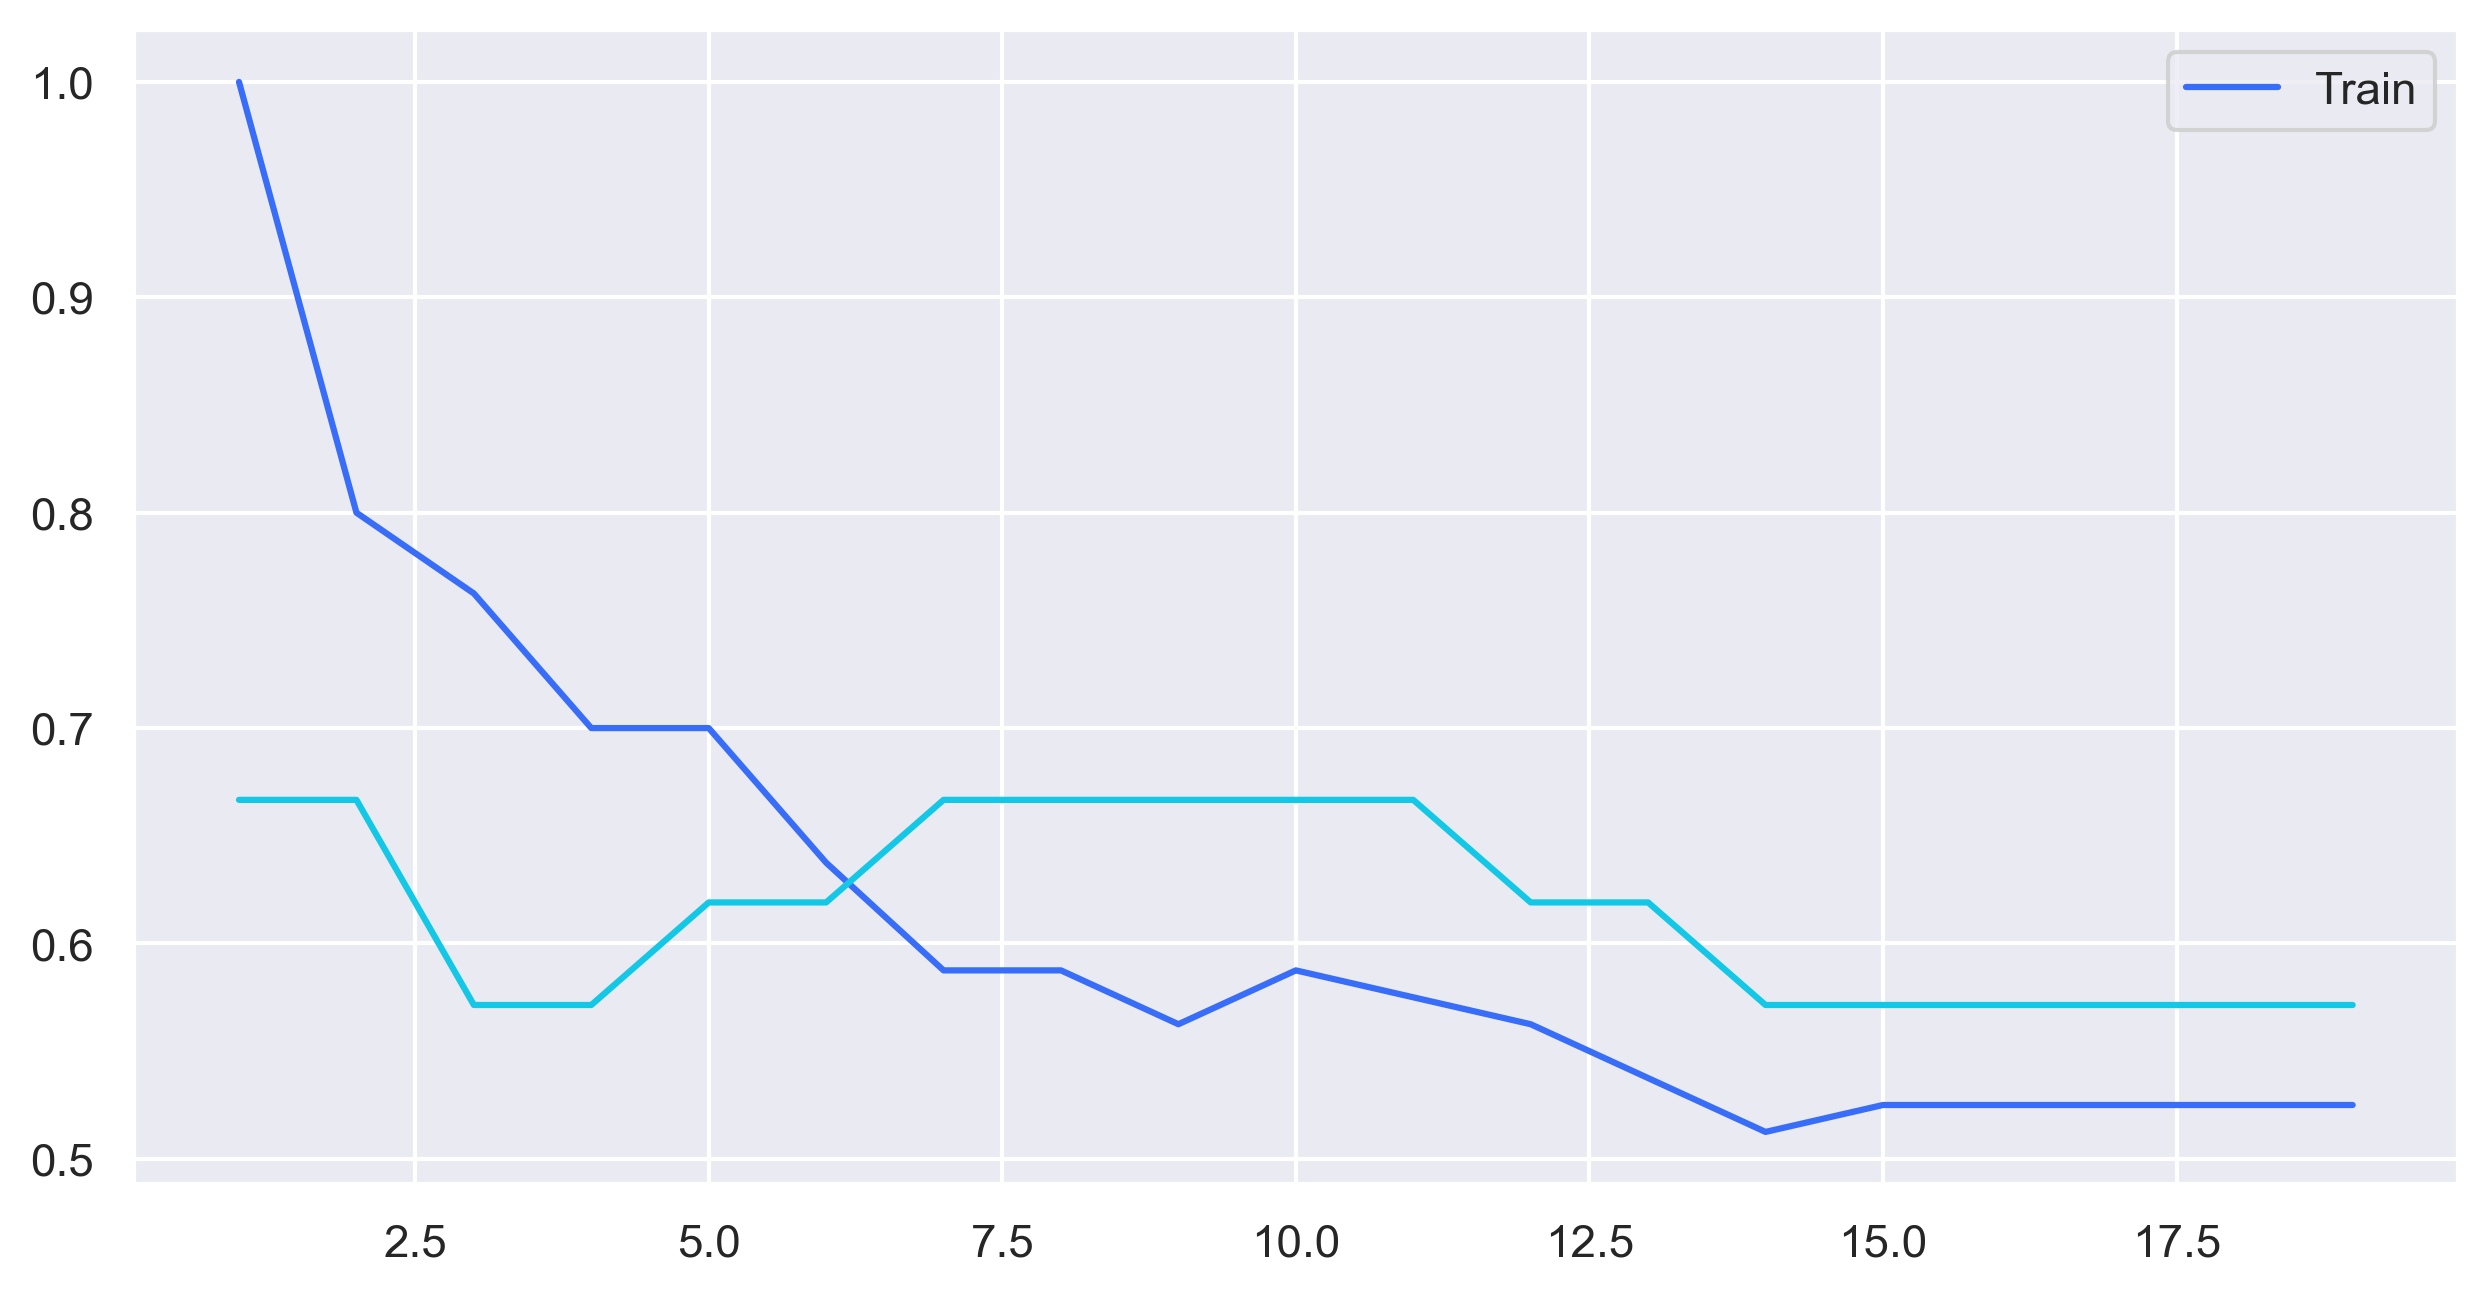

In [56]:
plt.plot(range(1,20), train_acc, label= 'Train')
plt.plot(range(1,20), test_acc)
plt.legend()

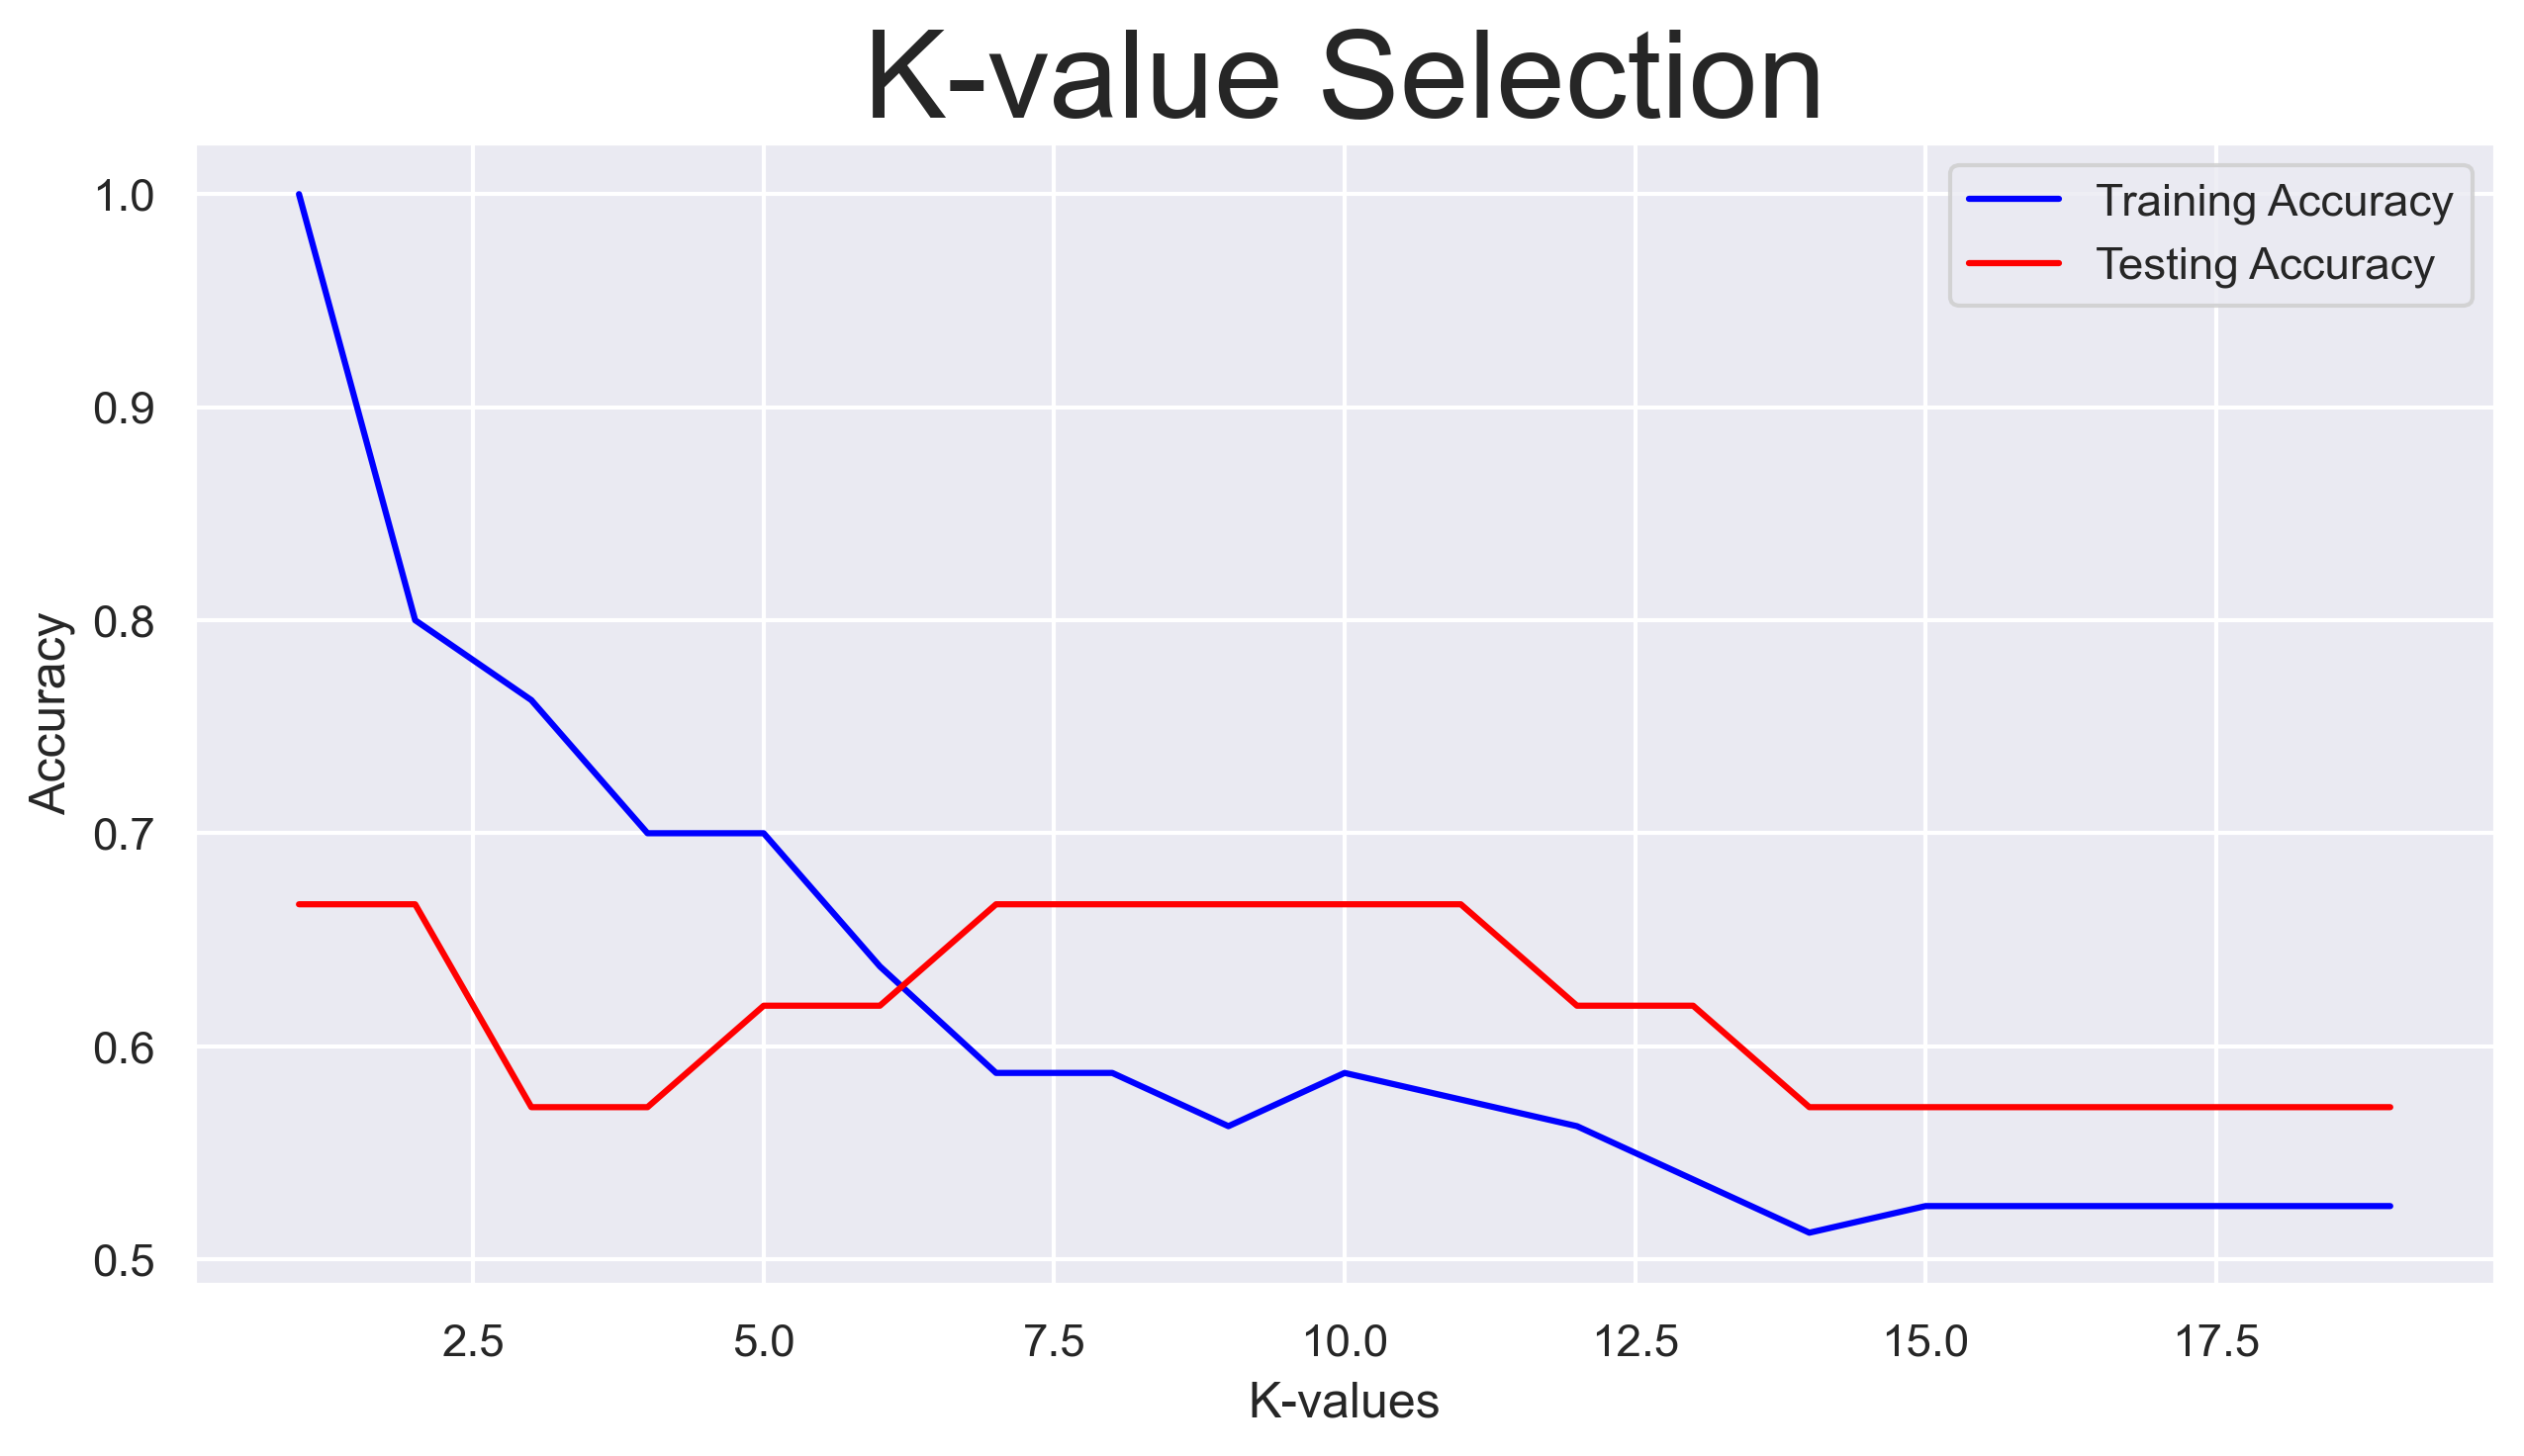

In [58]:
plt.plot(range(1,20), train_acc, color = 'blue', label= 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label= 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

In [60]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.6375, 0.6190476190476191)

In [62]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.62      0.83      0.71        12
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         1

    accuracy                           0.62        21
   macro avg       0.33      0.33      0.32        21
weighted avg       0.53      0.62      0.56        21



# Interview Questions:

In [ ]:
1. What are the key hyperparameters in KNN?
Answer:
-1.Number of Neighbors (k): The number of nearest neighbors to consider for making predictions.
2.Distance Metric: The method used to measure the distance between points (e.g., Euclidean, Manhattan).
3.Weight Function: Determines if all neighbors are weighted equally or if closer neighbors have more influence (e.g., uniform, distance-based).
Choosing the right values for these hyperparameters is crucial for the model's performance.


2.What distance metrics can be used in KNN?
Answer:
In k-Nearest Neighbors (KNN), various distance metrics can be used to determine the "closeness" of data points. Some commonly used distance metrics include
1.*Euclidean Distanc*: The straight-line distance between two points in Euclidean space

2*Manhattan Distanc*: The sum of the absolute differences of their coordinates

3*Minkowski Distanc*: A generalized form of both Euclidean and Manhattan distances

4*Chebyshev Distanc*: The maximum absolute difference along any coordinate dimension

5*Hamming Distanc*: The number of positions at which the corresponding elements are different (used for categorical data).

